# Imports

In [50]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Sabermetric Batting Data table

In [ ]:
#Store team stats in requests object
sabermetric_request = requests.get("https://www.baseball-reference.com/leagues/majors/2021-sabermetric-batting.shtml")

In [ ]:
sabermetric_soup = BeautifulSoup(sabermetric_request.text)

In [ ]:
# html nodes
first_table = sabermetric_soup.select('#teams_sabermetric_batting .center , #teams_sabermetric_batting .left , #teams_sabermetric_batting .right')

saber_elements = []
for element in first_table:
    saber_elements.append(element.text)

In [ ]:
saber_array = np.array(saber_elements)


# First remove totals from end of data frame
saber_array = saber_array[0:760]


# Get column headings
headings = np.append(['Tm'], saber_array[0:22])

# Remove extra headings from start of array
saber_array = saber_array[45:]
teams = saber_array[0:31]

raw_numbers = saber_array[33:]
saber_array = np.append(teams, raw_numbers)

saber_array = np.append(headings, saber_array)

In [ ]:
# Data frame dims should be 32 x 23

saber_table = headings
start_pos = 0
end_pos = 22
raw_numbers[start_pos:end_pos]

raw_numbers[start_pos+22:end_pos+22]

for i in range(len(teams)):
  team_data = np.append(teams[i], raw_numbers[start_pos:end_pos])
  saber_table = np.append(saber_table, team_data)
  start_pos += 22
  end_pos += 22

In [ ]:
saber_table = saber_table.reshape([32, 23])

#Generate Data Frame:
saberData = pd.DataFrame(saber_table, columns = headings)
saberData = saberData.drop(0, axis = 0)
#saberData = saberData.dropna(axis = 1)  

saberData['Year'] = 2021

saberData = saberData.reindex(columns = np.append('Year', headings))

# Successfully done for one year! Now turn in to a function and do for all years
saberData = saberData.iloc[:-1 , :]

saberData

,Year,Tm,R/G,Outs,RC,RC/G,AIR,BAbip,BA,lgBA,...,OPS,lgOPS,OPS+,OWn%,BtRuns,BtWins,TotA,SecA,ISO,PwrSpd
1,2021,Arizona Diamondbacks,4.19,4367,685,4.1,101,.295,.236,.247,...,.692,.740,87,.455,-97.2,-9.7,.635,.249,.146,66.2
2,2021,Atlanta Braves,4.91,4231,801,5.0,108,.288,.244,.256,...,.754,.765,96,.541,-35.3,-3.8,.724,.301,.191,94.6
3,2021,Baltimore Orioles,4.07,4297,678,4.2,99,.290,.239,.247,...,.705,.735,92,.461,-67.1,-6.8,.646,.251,.163,84.6
4,2021,Boston Red Sox,5.12,4234,835,5.2,106,.309,.261,.256,...,.777,.760,104,.563,30.5,2.8,.736,.285,.188,67.6
5,2021,Chicago Cubs,4.35,4291,697,4.3,102,.296,.237,.249,...,.719,.746,93,.471,-64.3,-6.6,.673,.275,.171,122.0
6,2021,Chicago White Sox,4.91,4206,777,4.9,100,.310,.256,.248,...,.758,.738,106,.533,51.6,4.9,.720,.282,.166,87.7
7,2021,Cincinnati Reds,4.85,4304,800,4.9,112,.296,.249,.261,...,.759,.780,94,.532,-47.0,-4.9,.718,.286,.182,62.0
8,2021,Cleveland Indians,4.43,4241,683,4.2,98,.282,.238,.246,...,.710,.732,94,.47,-51.1,-5.2,.668,.271,.169,141.8
9,2021,Colorado Rockies,4.59,4241,742,4.6,112,.299,.249,.262,...,.731,.783,87,.505,-116.9,-11.7,.686,.267,.165,107.2
10,2021,Detroit Tigers,4.30,4282,679,4.2,97,.300,.242,.244,...,.707,.726,95,.463,-39.0,-3.9,.657,.260,.158,118.0


In [ ]:
def saberyear(year):
  sabermetric_request = requests.get(f"https://www.baseball-reference.com/leagues/majors/{year}-sabermetric-batting.shtml")
  sabermetric_soup = BeautifulSoup(sabermetric_request.text)
  
  # html nodes
  first_table = sabermetric_soup.select('#teams_sabermetric_batting .center , #teams_sabermetric_batting .left , #teams_sabermetric_batting .right')

  saber_elements = []
  for element in first_table:
    saber_elements.append(element.text)


  saber_array = np.array(saber_elements)


  # First remove totals from end of data frame
  saber_array = saber_array[0:760]

  # Get column headings
  headings = np.append(['Tm'], saber_array[0:22])

  # Remove extra headings from start of array
  saber_array = saber_array[45:]
  teams = saber_array[0:31]

  raw_numbers = saber_array[33:]
  saber_array = np.append(teams, raw_numbers)

  saber_array = np.append(headings, saber_array)

  saber_table = headings
  start_pos = 0
  end_pos = 22
  raw_numbers[start_pos:end_pos]

  raw_numbers[start_pos+22:end_pos+22]

  for i in range(len(teams)):
    team_data = np.append(teams[i], raw_numbers[start_pos:end_pos])
    saber_table = np.append(saber_table, team_data)
    start_pos += 22
    end_pos += 22

  saber_table = saber_table.reshape([32, 23])

  #Generate Data Frame:
  saberData = pd.DataFrame(saber_table, columns = headings)
  saberData = saberData.drop(0, axis = 0)
  #saberData = saberData.dropna(axis = 1)  

  saberData['Year'] = year

  saberData = saberData.reindex(columns = np.append('Year', headings))

  return saberData.iloc[:-1 , :]

In [ ]:
# Test out function on a year

df = saberyear(2019)
df

,Year,Tm,R/G,Outs,RC,RC/G,AIR,BAbip,BA,lgBA,...,OPS,lgOPS,OPS+,OWn%,BtRuns,BtWins,TotA,SecA,ISO,PwrSpd
1,2019,Arizona Diamondbacks,5.02,4419,831,5.0,111,.293,.252,.259,...,.757,.779,94,.507,-51.3,-5.1,.723,.291,.182,125.7
2,2019,Atlanta Braves,5.28,4320,898,5.6,115,.305,.258,.265,...,.789,.795,98,.553,-18.7,-2.0,.770,.317,.195,131.1
3,2019,Baltimore Orioles,4.50,4417,737,4.5,107,.293,.246,.254,...,.725,.763,90,.447,-85.5,-8.2,.674,.260,.168,120.5
4,2019,Boston Red Sox,5.56,4437,941,5.7,112,.313,.269,.260,...,.806,.783,106,.557,50.4,4.5,.776,.305,.197,106.5
5,2019,Chicago Cubs,5.02,4303,848,5.3,110,.297,.252,.258,...,.783,.776,102,.528,13.2,1.0,.750,.310,.200,76.5
6,2019,Chicago White Sox,4.40,4296,730,4.6,105,.329,.261,.252,...,.728,.757,93,.456,-59.3,-5.8,.661,.228,.153,93.6
7,2019,Cincinnati Reds,4.33,4334,747,4.6,115,.288,.244,.265,...,.736,.795,85,.467,-134.0,-12.9,.693,.276,.178,118.3
8,2019,Cleveland Indians,4.75,4302,787,4.9,110,.289,.250,.258,...,.756,.776,95,.489,-41.1,-4.1,.726,.299,.183,140.9
9,2019,Colorado Rockies,5.15,4394,872,5.3,124,.321,.265,.275,...,.782,.826,89,.531,-109.0,-10.6,.740,.284,.190,107.8
10,2019,Detroit Tigers,3.61,4395,644,3.9,107,.308,.240,.255,...,.682,.767,78,.39,-181.1,-17.3,.610,.225,.148,82.5


In [ ]:
# Conjoin data frames
big_data = saberyear(2000)

for year in range(2001, 2022):
    df = saberyear(year)
    big_data = pd.concat([big_data, df], axis = 0, ignore_index = True)

big_data

,Year,Tm,R/G,Outs,RC,RC/G,AIR,BAbip,BA,lgBA,...,OPS,lgOPS,OPS+,OWn%,BtRuns,BtWins,TotA,SecA,ISO,PwrSpd
0,2000,Anaheim Angels,5.33,4322,953,5.9,117,.303,.280,.279,...,.825,.800,105,.529,39.4,3.3,.805,.308,.193,133.4
1,2000,Arizona Diamondbacks,4.89,4338,829,5.1,120,.290,.265,.278,...,.763,.810,88,.481,-116.0,-10.8,.726,.270,.164,125.8
2,2000,Atlanta Braves,5.00,4314,856,5.3,116,.302,.271,.273,...,.775,.797,95,.498,-45.1,-4.3,.754,.282,.157,162.0
3,2000,Baltimore Orioles,4.90,4335,832,5.1,111,.293,.272,.270,...,.776,.777,100,.466,5.2,0.3,.740,.275,.163,149.6
4,2000,Boston Red Sox,4.89,4360,852,5.2,118,.297,.267,.280,...,.764,.803,90,.474,-88.3,-8.2,.721,.267,.156,68.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,2021,St. Louis Cardinals,4.36,4253,735,4.5,97,.287,.244,.242,...,.725,.727,99,.499,-3.7,-0.6,.685,.270,.168,122.8
656,2021,Tampa Bay Rays,5.29,4335,792,4.8,93,.294,.243,.239,...,.750,.713,110,.528,85.9,8.3,.725,.301,.186,126.0
657,2021,Texas Rangers,3.86,4340,613,3.7,98,.280,.232,.246,...,.670,.732,83,.411,-131.9,-13.2,.611,.238,.143,129.7
658,2021,Toronto Blue Jays,5.22,4198,866,5.4,102,.296,.266,.250,...,.797,.745,113,.583,93.3,8.9,.766,.302,.200,123.7


# Adding the postseason column

In [ ]:
postseason_Request = requests.get('https://www.baseball-reference.com/postseason/') # request of the playoff team web page

In [ ]:
postseason_soup = BeautifulSoup(postseason_Request.text) # turning the request into a BeautifulSoup object
postseason_data = postseason_soup.select('#postseason_series a') # using the proper HTML node to get the year and all the playoff teams

In [ ]:
starting_pos = 0 
ending_pos = 3
index_names = ['Year', 'Winner', 'Loser']
Post_Teams = pd.DataFrame(columns=index_names)


# loop to make the data frame row by row
for series in range(1, 181):  # there were 180 different playoff series between 2000 and 2021
    post_series_list = []
    for entry in postseason_data[starting_pos:ending_pos]: # starting and ending are 0 and 3 because each row consists of only 3 values
        post_series_list.append(entry.text)
    post_series_Series = pd.Series(post_series_list, index=index_names) # create a pandas Series from the list containing the 3 values and make the index the same as the DataFrame col names
    Post_Teams = Post_Teams.append(post_series_Series, ignore_index=True) # add the Series as a row to the DataFrame (we can do this b/c the index matches the col names)
    starting_pos += 3 # increase the starting and ending values by 3 so that the next iteration will grab the next 3 values 
    ending_pos += 3
Post_Teams # what the loop created

,Year,Winner,Loser
0,2021 World Series,"Atlanta Braves (88-73, NL)","Houston Astros (95-67, AL)"
1,2021 ALCS,"Houston Astros (95-67, AL)","Boston Red Sox* (92-70, AL)"
2,2021 NLCS,"Atlanta Braves (88-73, NL)","Los Angeles Dodgers* (106-56, NL)"
3,2021 ALDS1,"Houston Astros (95-67, AL)","Chicago White Sox (93-69, AL)"
4,2021 ALDS2,"Boston Red Sox* (92-70, AL)","Tampa Bay Rays (100-62, AL)"
...,...,...,...
175,2000 NLCS,"New York Mets* (94-68, NL)","St. Louis Cardinals (95-67, NL)"
176,2000 ALDS1,"New York Yankees (87-74, AL)","Oakland Athletics (91-70, AL)"
177,2000 ALDS2,"Seattle Mariners* (91-71, AL)","Chicago White Sox (95-67, AL)"
178,2000 NLDS1,"St. Louis Cardinals (95-67, NL)","Atlanta Braves (95-67, NL)"


In [ ]:
# Using regular expressions to clean up each column to only what we want
Post_Teams.Year = Post_Teams.Year.str.extract('(\d{4})+') # there should be 4 digits then more characters after that; only take the 4 digits
Post_Teams.Year = Post_Teams.Year.astype('int') # make the year column type integer (not type float)
Post_Teams.Winner = Post_Teams.Winner.str.extract('([\w\s]+\.?[\w\s]+)\*? \(') # there should be letter characters, maybe a ".", more letter characters, maybe a "*", then a "("; grab everything before the "*" or the "(", whichever of those comes first
Post_Teams.Loser = Post_Teams.Loser.str.extract('([\w\s]+\.?[\w\s]+)\*? \(') # there should be letter characters, maybe a ".", more letter characters, maybe a "*", then a "("; grab everything before the "*" or the "(", whichever of those comes first
Post_Teams # new DataFrame with cleaned columns

,Year,Winner,Loser
0,2021,Atlanta Braves,Houston Astros
1,2021,Houston Astros,Boston Red Sox
2,2021,Atlanta Braves,Los Angeles Dodgers
3,2021,Houston Astros,Chicago White Sox
4,2021,Boston Red Sox,Tampa Bay Rays
...,...,...,...
175,2000,New York Mets,St. Louis Cardinals
176,2000,New York Yankees,Oakland Athletics
177,2000,Seattle Mariners,Chicago White Sox
178,2000,St. Louis Cardinals,Atlanta Braves


In [ ]:
playoff_col = []
for year in range(2000, 2022):
  Post_Teams_from_year = Post_Teams.loc[Post_Teams.Year == year, ]
  unique_Post_Teams_from_year = pd.concat([Post_Teams_from_year.Winner, Post_Teams_from_year.Loser]).unique()
  unique_Post_Teams_from_year = list(unique_Post_Teams_from_year)
  teams_from_year = big_data.loc[big_data.Year == year, 'Tm']

  for team in teams_from_year:
    if team in unique_Post_Teams_from_year:
      playoff_col.append(1)
    else:
      playoff_col.append(0)

In [ ]:
big_data['Playoff'] = playoff_col
big_data

,Year,Tm,R/G,Outs,RC,RC/G,AIR,BAbip,BA,lgBA,...,lgOPS,OPS+,OWn%,BtRuns,BtWins,TotA,SecA,ISO,PwrSpd,Playoff
0,2000,Anaheim Angels,5.33,4322,953,5.9,117,.303,.280,.279,...,.800,105,.529,39.4,3.3,.805,.308,.193,133.4,0
1,2000,Arizona Diamondbacks,4.89,4338,829,5.1,120,.290,.265,.278,...,.810,88,.481,-116.0,-10.8,.726,.270,.164,125.8,0
2,2000,Atlanta Braves,5.00,4314,856,5.3,116,.302,.271,.273,...,.797,95,.498,-45.1,-4.3,.754,.282,.157,162.0,1
3,2000,Baltimore Orioles,4.90,4335,832,5.1,111,.293,.272,.270,...,.777,100,.466,5.2,0.3,.740,.275,.163,149.6,0
4,2000,Boston Red Sox,4.89,4360,852,5.2,118,.297,.267,.280,...,.803,90,.474,-88.3,-8.2,.721,.267,.156,68.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,2021,St. Louis Cardinals,4.36,4253,735,4.5,97,.287,.244,.242,...,.727,99,.499,-3.7,-0.6,.685,.270,.168,122.8,1
656,2021,Tampa Bay Rays,5.29,4335,792,4.8,93,.294,.243,.239,...,.713,110,.528,85.9,8.3,.725,.301,.186,126.0,1
657,2021,Texas Rangers,3.86,4340,613,3.7,98,.280,.232,.246,...,.732,83,.411,-131.9,-13.2,.611,.238,.143,129.7,0
658,2021,Toronto Blue Jays,5.22,4198,866,5.4,102,.296,.266,.250,...,.745,113,.583,93.3,8.9,.766,.302,.200,123.7,0


In [ ]:
# Convert object columns to numeric
numeric_columns = list(big_data.columns[2:24])


for column in numeric_columns:
  big_data[column] = pd.to_numeric(big_data[column], errors = 'coerce')

big_data

,Year,Tm,R/G,Outs,RC,RC/G,AIR,BAbip,BA,lgBA,...,lgOPS,OPS+,OWn%,BtRuns,BtWins,TotA,SecA,ISO,PwrSpd,Playoff
0,2000,Anaheim Angels,5.33,4322,953,5.9,117,0.303,0.280,0.279,...,0.800,105,0.529,39.4,3.3,0.805,0.308,0.193,133.4,0
1,2000,Arizona Diamondbacks,4.89,4338,829,5.1,120,0.290,0.265,0.278,...,0.810,88,0.481,-116.0,-10.8,0.726,0.270,0.164,125.8,0
2,2000,Atlanta Braves,5.00,4314,856,5.3,116,0.302,0.271,0.273,...,0.797,95,0.498,-45.1,-4.3,0.754,0.282,0.157,162.0,1
3,2000,Baltimore Orioles,4.90,4335,832,5.1,111,0.293,0.272,0.270,...,0.777,100,0.466,5.2,0.3,0.740,0.275,0.163,149.6,0
4,2000,Boston Red Sox,4.89,4360,852,5.2,118,0.297,0.267,0.280,...,0.803,90,0.474,-88.3,-8.2,0.721,0.267,0.156,68.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,2021,St. Louis Cardinals,4.36,4253,735,4.5,97,0.287,0.244,0.242,...,0.727,99,0.499,-3.7,-0.6,0.685,0.270,0.168,122.8,1
656,2021,Tampa Bay Rays,5.29,4335,792,4.8,93,0.294,0.243,0.239,...,0.713,110,0.528,85.9,8.3,0.725,0.301,0.186,126.0,1
657,2021,Texas Rangers,3.86,4340,613,3.7,98,0.280,0.232,0.246,...,0.732,83,0.411,-131.9,-13.2,0.611,0.238,0.143,129.7,0
658,2021,Toronto Blue Jays,5.22,4198,866,5.4,102,0.296,0.266,0.250,...,0.745,113,0.583,93.3,8.9,0.766,0.302,0.200,123.7,0


# Visualizations

In [ ]:
big_data.columns

Index(['Year', 'Tm', 'R/G', 'Outs', 'RC', 'RC/G', 'AIR', 'BAbip', 'BA', 'lgBA',
       'OBP', 'lgOBP', 'SLG', 'lgSLG', 'OPS', 'lgOPS', 'OPS+', 'OWn%',
       'BtRuns', 'BtWins', 'TotA', 'SecA', 'ISO', 'PwrSpd', 'Playoff'],
      dtype='object')

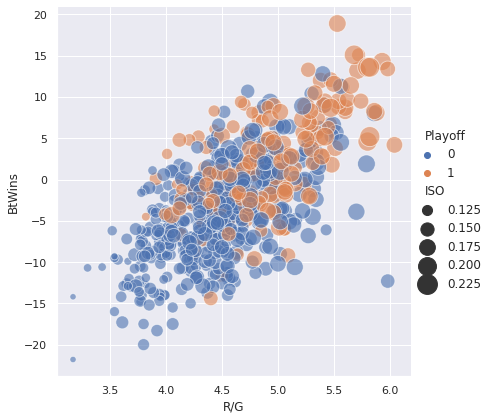

In [ ]:
sns.set_theme(style="darkgrid")
sns.relplot(x="R/G", y="BtWins", hue="Playoff", size="ISO",
            sizes=(40, 400), alpha=.6, palette="deep",
            height=6, data=big_data)

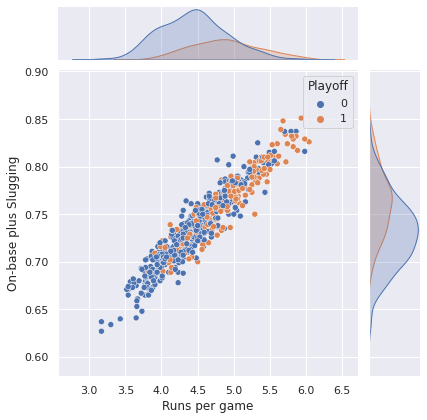

In [ ]:
p = sns.jointplot(data = big_data, x = 'R/G', y = 'OPS', hue = 'Playoff')
p.set_axis_labels(xlabel = "Runs per game", ylabel = "On-base plus Slugging")
plt.show()

In [ ]:
big_data[big_data['Playoff'] == 1]['R/G']

2      5.00
6      6.04
18     4.98
19     5.41
20     5.88
       ... 
645    4.56
648    4.39
654    4.96
655    4.36
656    5.29
Name: R/G, Length: 202, dtype: float64

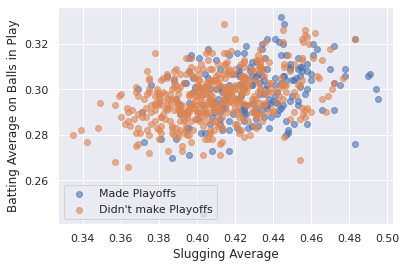

In [ ]:
plt.scatter(big_data[big_data['Playoff'] == 1]['SLG'], 
            big_data[big_data['Playoff'] == 1]['BAbip'], 
            label = "Made Playoffs", alpha = 0.6)
plt.scatter(big_data[big_data['Playoff'] == 0]['SLG'], 
            big_data[big_data['Playoff'] == 0]['BAbip'],
            label = "Didn't make Playoffs", alpha = 0.6)
plt.xlabel("Slugging Average")
plt.ylabel("Batting Average on Balls in Play")


plt.legend(loc = "lower left")